<a href="https://colab.research.google.com/github/shizacharania/Fish-Classification/blob/main/FishClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Images of nine different seafood types are collected from
the fish counter of a supermarket
While 50 distinct fish images
are collected per each of seven classes as follows: red mullet,
gilt head bream, horse mackerel, sea bass, red sea bream, black
sea sprat and striped red mullet, 30 distinct images are captured
for trout and shrimp. 
Furthermore, the
sample images of all nine classes are resized to 590×445 pixels
by nearly preserving their aspect ratio.
For each seafood type, 1000 images are finally obtained for
the construction of the dataset.
"""

'\nImages of nine different seafood types are collected from\nthe fish counter of a supermarket\nWhile 50 distinct fish images\nare collected per each of seven classes as follows: red mullet,\ngilt head bream, horse mackerel, sea bass, red sea bream, black\nsea sprat and striped red mullet, 30 distinct images are captured\nfor trout and shrimp. \nFurthermore, the\nsample images of all nine classes are resized to 590×445 pixels\nby nearly preserving their aspect ratio.\nFor each seafood type, 1000 images are finally obtained for\nthe construction of the dataset.\n'

In [ ]:
# from google.colab import files
# uploaded = files.upload()
!gdown --id 1BlFFeohbyaiMRh9CYtFLU2b_Kh8y8I3l

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BlFFeohbyaiMRh9CYtFLU2b_Kh8y8I3l
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 106kB/s]


In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# install kaggle library
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# directory for kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Copy the “kaggle.json” into this new directory
!cp kaggle.json ~/.kaggle/

In [ ]:
# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download the dataset through its API command
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

a-large-scale-fish-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/a-large-scale-fish-dataset.zip

In [ ]:
# path of all the images:
root_path = "/content/Fish_Dataset/Fish_Dataset"

In [ ]:
#Import the OS module
import os

#Get files in the current directory
classes = os.listdir("/content/Fish_Dataset/Fish_Dataset")

#Remove unecessary files
classes.remove('Segmentation_example_script.m')
classes.remove('license.txt')
classes.remove('README.txt')

# now we have the 9 classes for the dataset
print(classes)
print()

# 2 lists for the paths - images and their corresponding segmentation
image_paths = [[],[],[],[],[],[],[],[],[]]
labels = [[],[],[],[],[],[],[],[],[]]
# for each class
for i in range(len(classes)):
  # the image path (adds the class to the root_path)
  image_path = root_path + "/" + classes[i] + "/" + classes[i] + "/"

  # image files taken based on the image path
  image_files = os.listdir(image_path)
  image_files = image_files[:100]
  print("There are " + str(len(image_files)) + " files in the " + str(classes[i]) + " class.")

  # for all the image files, you add their path to the global variable of the image list
  for j in image_files:
    image_paths[i].append(image_path+j)
    labels[i].append(classes[i])

# total images + all the image paths
print("\nTotal images: " + str(len(image_paths[0]) + len(image_paths[1]) + len(image_paths[2]) + len(image_paths[3]) + len(image_paths[4]) + len(image_paths[5]) + len(image_paths[6]) + len(image_paths[7]) + len(image_paths[8])))
print(image_paths)

# total images + all the labels (corresponding to the above image paths)
print("\nTotal labels: " + str(len(labels[0]) + len(labels[1]) + len(labels[2]) + len(labels[3]) + len(labels[4]) + len(labels[5]) + len(labels[6]) + len(labels[7]) + len(labels[8])))
print(labels)

In [ ]:
# example

image_paths = image_paths[0] + image_paths[1] + image_paths[2] + image_paths[3] + image_paths[4] +  image_paths[5] +  image_paths[6] +  image_paths[7] +  image_paths[8]
print(len(image_paths))

labels = labels[0] + labels[1] + labels[2] + labels[3] + labels[4] +  labels[5] +  labels[6] +  labels[7] +  labels[8]
print(len(labels))

900
900


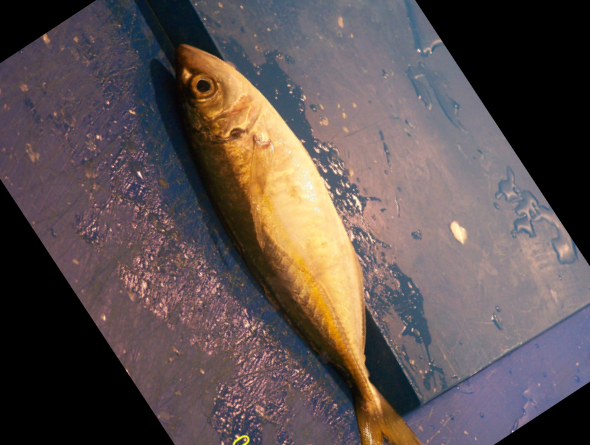

Hourse Mackerel

(445, 590, 3)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math

img = cv2.imread(image_paths[0])
cv2_imshow(img)
print(labels[0])
print()
print(img.shape)

In [ ]:
# calculating mean and standard deviation of the dataset
img = cv2.imread(image_paths[0])

total_pixels = img.shape[0]*img.shape[1]*len(image_paths)*3
print(total_pixels)

# print(img[0].size)
# print(img[1].size)
# print(img[400].size)
# print(images[0][0].size)
# print(img.size)
# print(images[0].sum())
# print(images[1].sum()/images[0].size)

total_sum = 0;
for img in image_paths:
  img = cv2.imread(img)
  total_sum += img.sum() # sum of the pixels in channel 1

mean = total_sum/total_pixels
print("mean: " + str(mean))

sum_squared_error = 0;
for img in image_paths:
  img = cv2.imread(img)
  sum_squared_error += ((img-mean)**2).sum()
std = math.sqrt(sum_squared_error/total_pixels) # not sure why its showing 7???

print("std: " + str(std))

708885000
mean: 87.20996427347173
std: 62.47080482765638


In [ ]:
# check if the range is at least similar - yes
print(img.mean())
print(img.std())

67.5103777058338
60.88354415543955


In [ ]:
import torch
from torchvision import transforms

def loading_data(image_filepaths, img_list):
  for path in image_filepaths:
    image = cv2.imread(path)
    image = cv2.resize(image, (112, 144))

    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.ConvertImageDtype(torch.float)])
    # transforms.Normalize((mean, mean, mean), (std,std,std)) <- make the picture black (didn't work)
    image = transform(image)
    img_list.append(image)

In [ ]:
images = []
loading_data(image_paths, images)
print(len(images))

900


In [ ]:
# 70 - 15 - 15 split (600 - 150 - 150)

training_imgs = images[0:600]
training_labels = labels[0:600]
validation_imgs = images[600:750]
validation_labels = labels[600:750]
testing_imgs = images[750:900]
testing_labels = labels[750:900]

print(len(training_imgs), len(training_labels))
print(len(validation_imgs), len(validation_labels))
print(len(testing_imgs), len(testing_labels))

600 600
150 150
150 150


In [ ]:
import random

training_data = list(zip(training_imgs, training_labels))
random.shuffle(training_data)
# tr_images, tr_labels = zip(*training_data)

validation_data = list(zip(validation_imgs, validation_labels))
random.shuffle(validation_data)
# v_images, v_labels = zip(*validation_data)

testing_data = list(zip(testing_imgs, testing_labels))
random.shuffle(testing_data)
# te_images, te_labels = zip(*testing_data)

In [ ]:
# training_data = list(zip(tr_images, tr_labels))
# validation_data = list(zip(tr_images, tr_labels))
# testing_data = list(zip(tr_images, tr_labels))

trainloader = torch.utils.data.DataLoader(training_data, batch_size=60)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=60)
testloader = torch.utils.data.DataLoader(testing_data, batch_size=60)

TRAINING DATA: 

torch.Size([3, 144, 112])
Shrimp


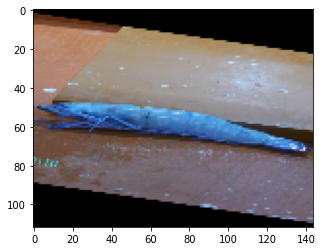

In [ ]:
import matplotlib.pyplot as plt

trimages, trlabels = next(iter(trainloader))

print("TRAINING DATA: \n")
img = trimages[2]
label = trlabels[2]
print(img.size())
img = img.permute(2,1,0)
plt.imshow(img)
print(label)

VALIDATION DATA: 

torch.Size([3, 144, 112])
Black Sea Sprat


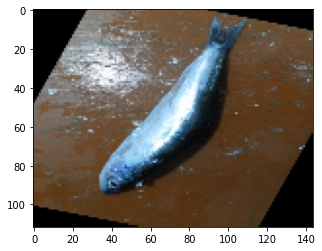

In [ ]:
vimages, vlabels = next(iter(validationloader))

print("VALIDATION DATA: \n")
img = vimages[10]
label = vlabels[10]
print(img.size())
img = img.permute(2,1,0)
plt.imshow(img)
print(label)

TESTING DATA: 

torch.Size([112, 144, 3])
Gilt-Head Bream


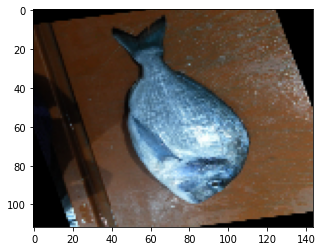

In [ ]:
teimages, telabels = next(iter(testloader))

print("TESTING DATA: \n")
img = teimages[10]
label = telabels[10]
img = img.permute(2,1,0)
print(img.size())
plt.imshow(img)
print(label)

In [144]:
# build the model - standard VGG-16
# https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png
# https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c#:~:text=VGG16%20is%20a%20convolution%20neural,vision%20model%20architecture%20till%20date.

import torch.nn as nn

# (445, 590, 3)
# (112, 144, 3)

model = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3,padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,padding=1),
                      nn.ReLU(),

                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,padding=1),
                      nn.ReLU(),

                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3,padding=1),
                      nn.ReLU(),

                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3,padding=1),
                      nn.ReLU(),

                      nn.MaxPool2d(kernel_size=2, stride=2),
                      
                      nn.Flatten(),
                      nn.Linear(32256, 4096),
                      nn.Linear(4096, 1000),
                      nn.Linear(1000, 9))

In [145]:
X = torch.rand(size=(1, 3, 112, 144), dtype=torch.float32)
for layer in model:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 64, 112, 144])
ReLU output shape: 	 torch.Size([1, 64, 112, 144])
Conv2d output shape: 	 torch.Size([1, 64, 112, 144])
ReLU output shape: 	 torch.Size([1, 64, 112, 144])
MaxPool2d output shape: 	 torch.Size([1, 64, 56, 72])
Conv2d output shape: 	 torch.Size([1, 128, 56, 72])
ReLU output shape: 	 torch.Size([1, 128, 56, 72])
Conv2d output shape: 	 torch.Size([1, 128, 56, 72])
ReLU output shape: 	 torch.Size([1, 128, 56, 72])
MaxPool2d output shape: 	 torch.Size([1, 128, 28, 36])
Conv2d output shape: 	 torch.Size([1, 256, 28, 36])
ReLU output shape: 	 torch.Size([1, 256, 28, 36])
Conv2d output shape: 	 torch.Size([1, 256, 28, 36])
ReLU output shape: 	 torch.Size([1, 256, 28, 36])
Conv2d output shape: 	 torch.Size([1, 256, 28, 36])
ReLU output shape: 	 torch.Size([1, 256, 28, 36])
MaxPool2d output shape: 	 torch.Size([1, 256, 14, 18])
Conv2d output shape: 	 torch.Size([1, 512, 14, 18])
ReLU output shape: 	 torch.Size([1, 512, 14, 18])
Conv2d output sh